In [1]:
import numpy as np

In [2]:
data=np.load("part1b.npz")

In [3]:
data.files

['N', 'Lc', 'Ic_0', 'gamma', 'L_validation', 'L_test', 'betas_validation']

In [4]:
data["N"]

array(50000.)

In [5]:
data['Lc'].shape

(4,)

In [6]:
data['betas_validation']

array([[0.1 , 0.15, 0.2 , 0.25],
       [0.2 , 0.25, 0.3 , 0.4 ],
       [0.35, 0.45, 0.5 , 0.6 ],
       [0.4 , 0.5 , 0.6 , 0.8 ]])

In [7]:
nx=np.sum(data['Ic_0'],axis=1)

In [8]:
data["L_validation"]

array([[  151.15723798,   157.09236032,   166.0663423 ,   175.26894184,
          187.12271809,   200.29536627,   207.19011153,   220.23944915,
          235.52590645,   247.09469931,   263.51055631,   281.18896107,
          304.53407513,   316.7776232 ,   337.4146583 ,   359.08603642,
          376.95873111,   410.63777058,   432.23666001,   466.32640805],
       [  168.20103748,   175.31698233,   184.41546073,   191.23318015,
          200.38958258,   212.84378649,   222.09570163,   237.44506788,
          251.13497681,   263.20329764,   281.12505942,   299.02683147,
          312.07088043,   336.08191882,   353.17466265,   372.3214408 ,
          404.21116271,   424.09816716,   450.52039605,   482.72819186],
       [  108.25555772,   116.61301613,   122.162737  ,   128.61290071,
          136.27974903,   143.16249542,   153.75545994,   158.05373752,
          171.84080869,   178.44468654,   190.6241656 ,   202.74814433,
          214.01601724,   233.09216822,   246.84519371,   265.

In [14]:
N=50000
Ic_01=data['Ic_0']
Ic_0=nx
not_inf=50000-Ic_0 #origin population not infected 
nd=not_inf.reshape(-1,1)
#print(not_inf)
#print(leaf1.shape)
#print(leaf1)


leaf_nodes=np.array([[.5,.3,.1,.1],[.4,.3,.2,.1],[.3,.3,.2,.2],[.1,.2,.3,.4]])
leafs=leaf_nodes.reshape(-1,1)

leaf1=np.dot(nd,leafs.transpose())# finding the intial suspectiable population 
#leaf2=np.dot(leaf_nodes,not_inf.transpose())
#leaf1



L_val=data["L_validation"]
Lc=data['Lc']
#lc1=Lc.reshape(-1,1)
betas_v=data["betas_validation"].reshape(-1,1)

Rc=np.array([0])
t=np.linspace(0,20,20)
I=np.sum(Ic_0)
Gamma=data["gamma"]
d=10000

initial_vec=np.concatenate([leaf1.flatten(),Ic_01.flatten(),Rc.flatten()])
print(betas_v.shape)

(16, 1)


In [15]:
def SIR(t,y,betas,gammas):
    S_vec=y[0:16]
    I_vec=y[16:20]
    R_vec=y[20]
    
    N=50000 ##population size 
    
    dsvc_dt=-(betas*S_vec*sum(I_vec)/N)
    dic_dt=-(np.sum(dsvc_dt,axis=0))-(gammas*I_vec)
    dr_dt=gammas*sum(I_vec)
    
    vectors=np.concatenate([dsvc_dt.flatten(),dic_dt.flatten(),dr_dt.flatten()])
    #breakpoint()
    return vectors

In [28]:
def SIR1(t,y,betas,gammas):
    S_vec=y[0:320]#.reshape(20,16)
    I_vec=y[320:400]#.reshape(20,4)
    R_vec=y[400]
    
    N=50000 ##population size 
    #breakpoint()
    dsvc_dt=-(betas*S_vec*np.sum(I_vec)/N)
    dic_dt=-(np.sum(dsvc_dt,axis=0))-(gammas*I_vec)
    dr_dt=gammas*sum(I_vec)
    
    vectors=np.concatenate([dsvc_dt.flatten(),dic_dt.flatten(),dr_dt.flatten()])
    #breakpoint()
    return vectors

In [ ]:
for (beta) in betas_v:
    #breakpoint()
    soln_obj=solve_ivp(SIR1, (t[0], t[-1]), initial_vec,\
                                     t_eval=t, args=(beta, Gamma))


    S_predicted=soln_obj.y[0:320]
    I_predicted=soln_obj.y[320:400].reshape(-1,4)
    R_predicted=soln_obj.y[400]
    breakpoint()
    L_predicted=np.dot(Lc.transpose(),I_predicted)
    mse= mean_squared_error(observed_data, L_predicted)

    #breakpoint()
    
    if mse<mmse:
        mmse = mse
        beta_mmse=beta


> <ipython-input-28-06e337aa9dfa>(14)SIR1()
     10     dr_dt=gammas*sum(I_vec)
     11 
     12     vectors=np.concatenate([dsvc_dt.flatten(),dic_dt.flatten(),dr_dt.flatten()])
     13     breakpoint()
---> 14     return vectors

ipdb> vectors
array([ -201.674338  ,  -121.0046028 ,   -40.3348676 ,   -40.3348676 ,
        -161.3394704 ,  -121.0046028 ,   -80.6697352 ,   -40.3348676 ,
        -121.0046028 ,  -121.0046028 ,   -80.6697352 ,   -80.6697352 ,
         -40.3348676 ,   -80.6697352 ,  -121.0046028 ,  -161.3394704 ,
        -201.633798  ,  -120.9802788 ,   -40.3267596 ,   -40.3267596 ,
        -161.3070384 ,  -120.9802788 ,   -80.6535192 ,   -40.3267596 ,
        -120.9802788 ,  -120.9802788 ,   -80.6535192 ,   -80.6535192 ,
         -40.3267596 ,   -80.6535192 ,  -120.9802788 ,  -161.3070384 ,
        -201.962172  ,  -121.1773032 ,   -40.3924344 ,   -40.3924344 ,
        -161.5697376 ,  -121.1773032 ,   -80.7848688 ,   -40.3924344 ,
        -121.1773032 ,  -121.1773032 ,   -80.

In [18]:
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
beta_grid=np.linspace(0.01,1.0,20)
lf_nodes=20
observed_data=L_val
mmse=np.inf
beta_mmse=np.nan
Rc=np.zeros((lf_nodes))
d=100000
for (beta) in beta_grid:
    #breakpoint()
    cumulative_mse = 0.0
    
    for node_index in range(lf_nodes):
        initial_conditions=np.concatenate([leaf1[node_index].flatten(), Ic_01[node_index].flatten(), Rc[node_index].flatten()])

        soln_obj=solve_ivp(SIR, (t[0], t[-1]), initial_conditions,\
                                     t_eval=t, args=(beta, Gamma))


        S_predicted=soln_obj.y[0:16]
        I_predicted=soln_obj.y[16:20]
        R_predicted=soln_obj.y[20]
        
        
        L_predicted=np.dot(Lc,I_predicted)
        
        #breakpoint()
        cumulative_mse += mean_squared_error(observed_data[node_index],L_predicted) 
        #breakpoint()
    nm=cumulative_mse
    #breakpoint()
    if cumulative_mse<mmse  :
        mmse=mse
        beta_mmse=beta
       
        
print(f"True values are beta=")
print(f"Estimated values are beta={beta_mmse:.2f}")
#print(I_predicted)


True values are beta=
Estimated values are beta=nan


<function matplotlib.pyplot.show(*args, **kw)>

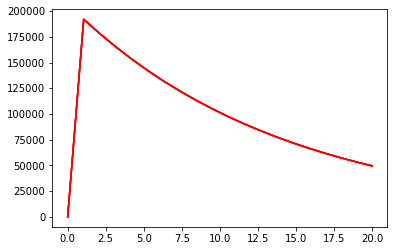

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.plot(t.transpose(), I_predicted.transpose(), 'r') # red 
plt.show 